In [ ]:
%pip install cartopy            #install required packages

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 62.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.patches import Rectangle
from scipy import stats
from matplotlib.ticker import MaxNLocator


* Dataset file name: rlut_CERES-EBAF_L3B_Ed2-8_200003-201404.nc
* Variable: TOA Outgoing Longwave Radiation
* Temporal resolution and extent: Monthly averaged from 03/2000 to 04/2014

In [ ]:
#load dataset and check information

f = xr.open_dataset('/content/GPCP_precip.mon.mean.nc')
#print(f)                            #check information of the datasets
print(f.dims)
print(f.data_vars)
print(f.coords)
print(f.attrs)

FrozenMappingWarningOnValuesAccess({'lat': 72, 'lon': 144, 'time': 540, 'nv': 2})
Data variables:
    time_bnds  (time, nv) datetime64[ns] 9kB ...
    lat_bnds   (lat, nv) float32 576B ...
    lon_bnds   (lon, nv) float32 1kB ...
    precip     (time, lat, lon) float32 22MB ...
Coordinates:
  * lat      (lat) float32 288B -88.75 -86.25 -83.75 ... 83.75 86.25 88.75
  * lon      (lon) float32 576B 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
  * time     (time) datetime64[ns] 4kB 1979-01-01 1979-02-01 ... 2023-12-01
{'Conventions': 'CF-1.0', 'curator': 'Dr. Jian-Jian Wang\nESSIC, University of Maryland College Park\nCollege Park, MD  20742  USA\nPhone: +1 301-405-4887', 'citation': 'Adler, R.F., G.J. Huffman, A. Chang, R. Ferraro, P. Xie, J. Janowiak, B. \nRudolf, U. Schneider, S. Curtis, D. Bolvin, A. Gruber, J. Susskind, P. \nArkin, 2003: The Version 2 Global Precipitation Climatology Project \n(GPCP) Monthly Precipitation Analysis (1979 - Present). J. Hydrometeor., \n4(6), 1147-116

In [ ]:
# Check variable

olr = f['precip']                                  #our target variable
print(olr)
for dim_name in olr.dims:                        #print the dimensions
    print(f'Dimension name: {dim_name}')
    print(f'Dimension data: {olr[dim_name]}')
    print("-----------------------")

<xarray.DataArray 'precip' (time: 540, lat: 72, lon: 144)> Size: 22MB
[5598720 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 288B -88.75 -86.25 -83.75 ... 83.75 86.25 88.75
  * lon      (lon) float32 576B 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
  * time     (time) datetime64[ns] 4kB 1979-01-01 1979-02-01 ... 2023-12-01
Attributes:
    long_name:                Average Monthly Rate of Precipitation
    valid_range:              [  0. 100.]
    units:                    mm/day
    precision:                32767
    least_significant_digit:  2
    var_desc:                 Precipitation
    dataset:                  GPCP Version 2.3 Combined Precipitation Dataset
    level_desc:               Surface
    statistic:                Mean
    parent_stat:              Mean
    actual_range:             [0.0000000e+00 5.2265985e+21]
Dimension name: time
Dimension data: <xarray.DataArray 'time' (time: 540)> Size: 4kB
array(['1979-01-01T00:00:00.000000000', '1979-02

/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


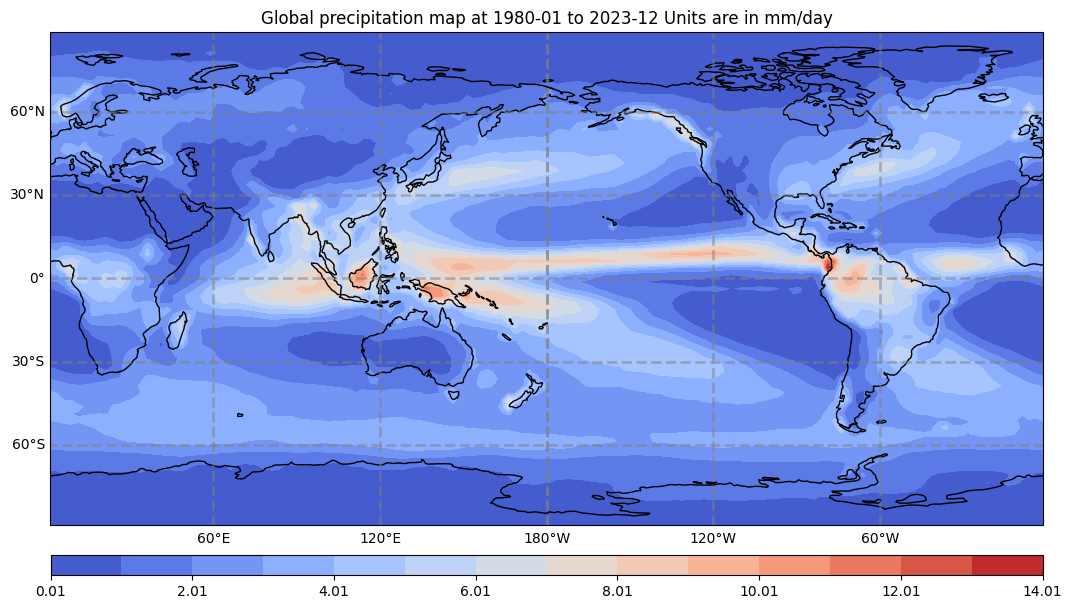

In [ ]:
#plot global contour
inital_day = "1980-01"
final_day = "2023-12"
olr = f['precip'].sel(time = slice(inital_day,final_day))                                            #select complete years
olr_mean = olr.mean('time')                                                                 #calculate temporal average
fig = plt.figure(figsize=(16, 8))                                                           #create an empty figure
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude = 180))         #add a subplot with projection
cf = ax.contourf(olr_mean.lon, olr_mean.lat, olr_mean, np.arange(olr_mean.min(),olr_mean.max(),1) , cmap = "coolwarm", transform=ccrs.PlateCarree())    #plot contour
cb = plt.colorbar(cf, orientation='horizontal', shrink=0.8, aspect=50, pad=0.05)            #add colorbar
ax.set_title('Global precipitation map at '+inital_day + " to " +final_day + " Units are in mm/day"  )                                     #set title
ax.add_feature(cfeature.COASTLINE)                                                          #add coastlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color='gray', alpha=0.5, linestyle='--')              #add gridlines
gl.ylocator = mticker.FixedLocator([-60, -30, 0, 30, 60])                                   #set positions of ticks
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER                                                         #set tick format
gl.yformatter = LATITUDE_FORMATTER
plt.show()

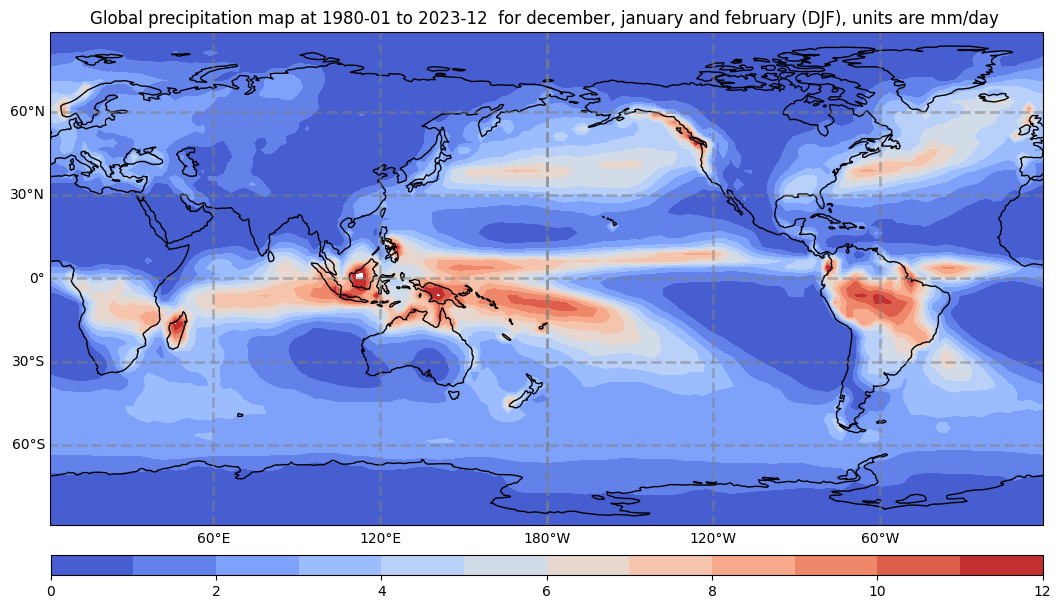

In [ ]:
#plot global contour
inital_day = "1980-01"
final_day = "2023-12"



# Extract the january months by selecting
# the relevant indices
olr = f['precip'].sel(time = slice(inital_day,final_day))                                            #select complete years
# Use .groupby('time.month') to organize the data into months
olr = olr.sel(time= olr["time.season"] == "DJF")
olr_mean = olr.mean('time')                                                                 #calculate temporal average
fig = plt.figure(figsize=(16, 8))                                                           #create an empty figure
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude = 180))         #add a subplot with projection
cf = ax.contourf(olr_mean.lon, olr_mean.lat, olr_mean, np.arange(olr_mean.min(),olr_mean.max(),1) , cmap = "coolwarm", transform=ccrs.PlateCarree())    #plot contour
cb = plt.colorbar(cf, orientation='horizontal', shrink=0.8, aspect=50, pad=0.05)            #add colorbar
ax.set_title('Global precipitation map at '+inital_day + " to " +final_day +"  for december, january and february (DJF), units are mm/day "  )                                     #set title
ax.add_feature(cfeature.COASTLINE)                                                          #add coastlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color='gray', alpha=0.5, linestyle='--')              #add gridlines
gl.ylocator = mticker.FixedLocator([-60, -30, 0, 30, 60])                                   #set positions of ticks
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER                                                         #set tick format
gl.yformatter = LATITUDE_FORMATTER
plt.show()

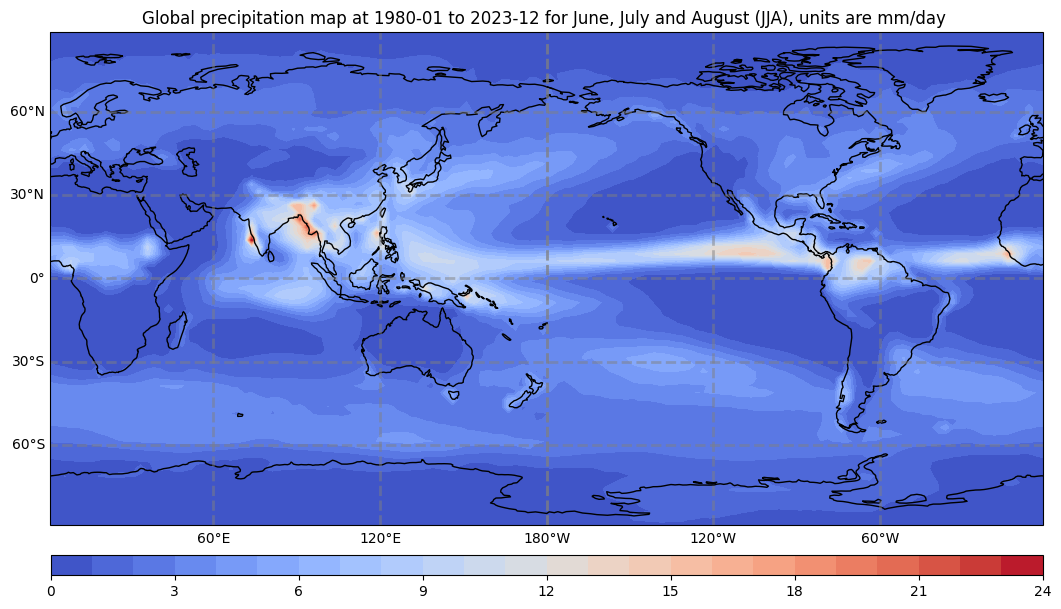

In [ ]:
#plot global contour
inital_day = "1980-01"
final_day = "2023-12"



# Extract the january months by selecting
# the relevant indices
olr = f['precip'].sel(time = slice(inital_day,final_day))                                            #select complete years
# Use .groupby('time.month') to organize the data into months
olr = olr.sel(time= olr["time.season"] == "JJA")
olr_mean = olr.mean('time')                                                                 #calculate temporal average
fig = plt.figure(figsize=(16, 8))                                                           #create an empty figure
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude = 180))         #add a subplot with projection
cf = ax.contourf(olr_mean.lon, olr_mean.lat, olr_mean, np.arange(olr_mean.min(),olr_mean.max(),1) , cmap = "coolwarm", transform=ccrs.PlateCarree())    #plot contour
cb = plt.colorbar(cf, orientation='horizontal', shrink=0.8, aspect=50, pad=0.05)            #add colorbar
ax.set_title('Global precipitation map at '+inital_day + " to " +final_day +" for June, July and August (JJA), units are mm/day "  )                                     #set title
ax.add_feature(cfeature.COASTLINE)                                                          #add coastlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color='gray', alpha=0.5, linestyle='--')              #add gridlines
gl.ylocator = mticker.FixedLocator([-60, -30, 0, 30, 60])                                   #set positions of ticks
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER                                                         #set tick format
gl.yformatter = LATITUDE_FORMATTER
plt.show()

In [ ]:
inital_day = "1980-01"
final_day = "2023-12"



# Extract the january months by selecting
# the relevant indices
olr = f['precip'].sel(time = slice(inital_day,final_day))
print(np.sum(np.where(np.isnan(olr),1,0)))                            #check if there are missing values

0


Linear Regression: y = ax + b, where a is the slope represents the relationship between the independent variable (e.g., time or years) and the dependent variable (e.g., variable values of a pixel).

Slope Calculation:
a = sxy / sxx
* sxy: the covariance between the independent variable x (years) and the dependent variable y.
* sxx: the variance of the independent variable x.

In [ ]:
#trend calculation

def Calculate_trend(var):
    var_yearmean = var.groupby('time.year').mean('time')                #calculate annual averages
    var_pixelmean = var_yearmean.mean(axis=0)                           #calculate temporal mean for each pixel
    sxy = np.zeros(var_pixelmean.shape)                                 #in linear regression, slope is sxy/sxx
    sxx = np.zeros(var_pixelmean.shape)
    x_mean = (var_yearmean.shape[0] + 1) / 2                            #x average
    for i in range(var_yearmean.shape[0]):                              #calculate sxy and sxx for each pixel
        sxy += (var_yearmean[i,:,:] - var_pixelmean) * (i + 1 - x_mean)
        sxx += np.ones(var_pixelmean.shape) * (i + 1 - x_mean)**2
    var_slope = sxy / sxx
    return var_slope

olr_slope = Calculate_trend(olr)

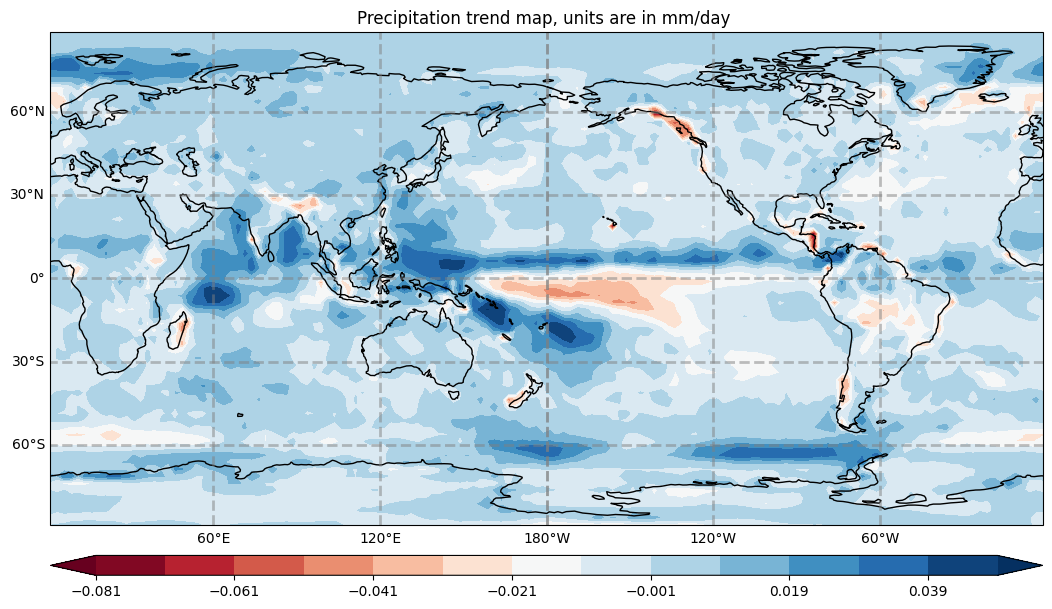

In [ ]:
#plot trend map

fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude = 180))
cf = ax.contourf( olr_mean.lon, olr_mean.lat, olr_slope, np.arange(olr_slope.min(),olr_slope.max(),0.01), extend='both', cmap = plt.cm.RdBu, transform=ccrs.PlateCarree())
cb = plt.colorbar(cf, orientation='horizontal', shrink=0.8, aspect=50, pad=0.05)
ax.set_title('Precipitation trend map, units are in mm/day ')
ax.add_feature(cfeature.COASTLINE)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.ylocator = mticker.FixedLocator([-60, -30, 0, 30, 60])
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
plt.show()

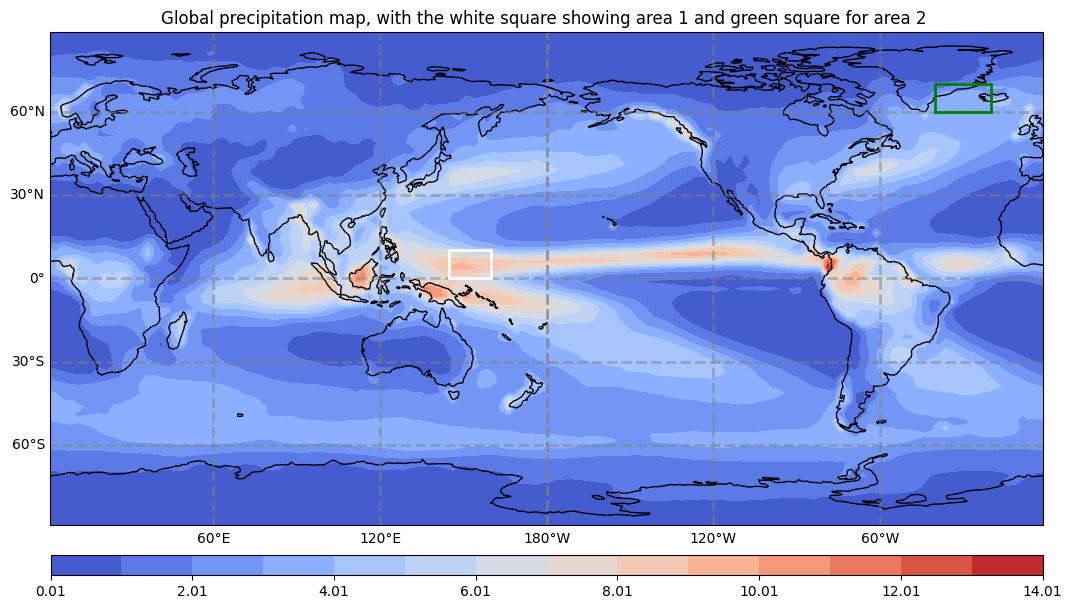

In [ ]:
#area selection

olr = f['precip'].sel(time = slice(inital_day,final_day))                                            #select complete years
# Use .groupby('time.month') to organize the data into months
#olr = olr.sel(time= olr["time.season"] == "DJF")
olr_mean = olr.mean('time')                                                                 #calculate temporal average
fig = plt.figure(figsize=(16, 8))                                                           #create an empty figure
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude = 180))         #add a subplot with projection
cf = ax.contourf(olr_mean.lon, olr_mean.lat, olr_mean, np.arange(olr_mean.min(),olr_mean.max(),1) , cmap = "coolwarm", transform=ccrs.PlateCarree())    #plot contour
cb = plt.colorbar(cf, orientation='horizontal', shrink=0.8, aspect=50, pad=0.05)
ax.set_title('Global precipitation map, with the white square showing area 1 and green square for area 2 ')
ax.add_feature(cfeature.COASTLINE)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.ylocator = mticker.FixedLocator([-60, -30, 0, 30, 60])
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

#area 1
lon01, lon11, lat01, lat11 = [145, 160, 0, 10]                                                           #selected area 1
start_point = (lon01, lat01)                                                                            #plot selected region on figure
selcted_area_1 = Rectangle(start_point, lon11-lon01, lat11-lat01, linewidth=2, linestyle='-', zorder=2,
                           edgecolor='white', facecolor='none', transform=ccrs.PlateCarree())
ax.add_patch(selcted_area_1)

#area 2
lon02, lon12, lat02, lat12 = [320, 340, 60, 70]
start_point = (lon02, lat02)
selcted_area_2 = Rectangle(start_point, lon12-lon02, lat12-lat02, linewidth=2, linestyle='-', zorder=2,
                           edgecolor='green', facecolor='none', transform=ccrs.PlateCarree())
ax.add_patch(selcted_area_2)
plt.show()

In [ ]:
def Calculate_trend_2d(var):
  x = np.arange(1,var.shape[0]+1)
  slope, intercept, R, p, _ = stats.linregress(x,var)
  trend_line = slope*x+intercept
  return slope , trend_line, R, p

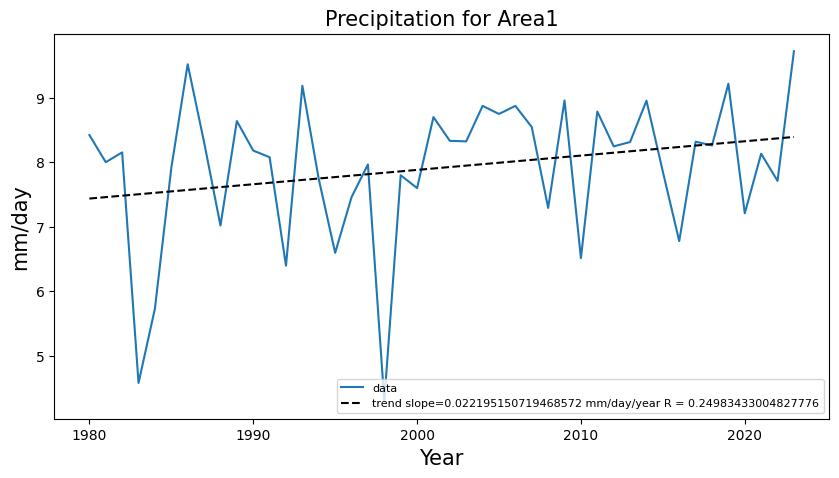

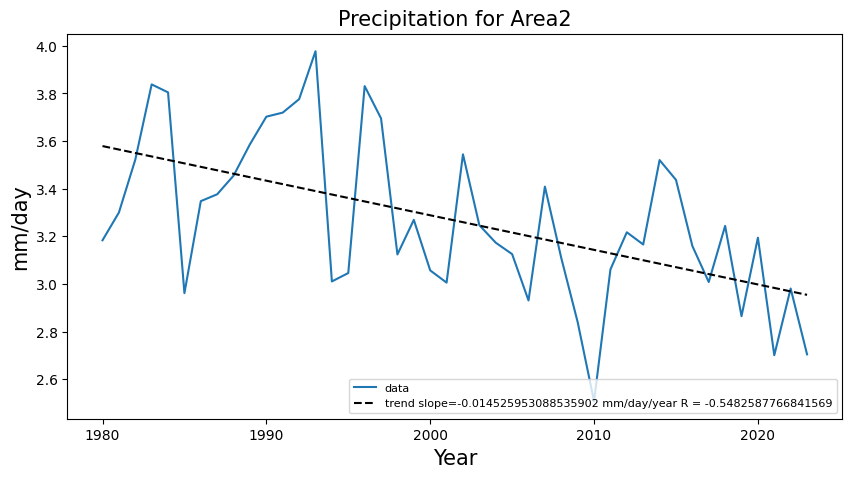

In [ ]:
#plot time series of spatiotemporal average OLR in area 1
olr_selected_1 = olr.sel(lon = slice(lon01,lon11), lat = slice(lat01,lat11))                          #select area 1
olr_selected_ymean_1 = olr_selected_1.groupby('time.year').mean('time').mean('lat').mean('lon')   #time series of spatiotemporal average
slope, trend_line,R, p = Calculate_trend_2d(olr_selected_ymean_1)
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(olr_selected_ymean_1.year, olr_selected_ymean_1, label="data")                                          #plot time series
ax.plot(olr_selected_ymean_1.year, trend_line, linestyle='--', color='k', label=f'trend slope={slope} mm/day/year'+f' R = {R}') #plot trend line
plt.legend(loc='lower right', fontsize=8)                                                                                            #add legend to show the line slope

plt.xlabel('Year', fontsize=15)
plt.ylabel('mm/day', fontsize=15)
plt.title('Precipitation for Area1', fontsize=15)
plt.show()

#plot time series of spatiotemporal average OLR in area 1
olr_selected_2 = olr.sel(lon = slice(lon02,lon12), lat = slice(lat02,lat12))                          #select area 1
olr_selected_ymean_2 = olr_selected_2.groupby('time.year').mean('time').mean('lat').mean('lon')   #time series of spatiotemporal average
slope2, trend_line2,R2, p2 = Calculate_trend_2d(olr_selected_ymean_2)
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(olr_selected_ymean_2.year, olr_selected_ymean_2, label="data")                                          #plot time series
ax.plot(olr_selected_ymean_2.year, trend_line2, linestyle='--', color='k', label=f'trend slope={slope2} mm/day/year'+f' R = {R2}') #plot trend line
plt.legend(loc='lower right', fontsize=8)                                                                                            #add legend to show the line slope

plt.xlabel('Year', fontsize=15)
plt.ylabel('mm/day', fontsize=15)
plt.title('Precipitation for Area2', fontsize=15)
plt.show()

In [ ]:
#plot time series of spatiotemporal average OLR in area 1


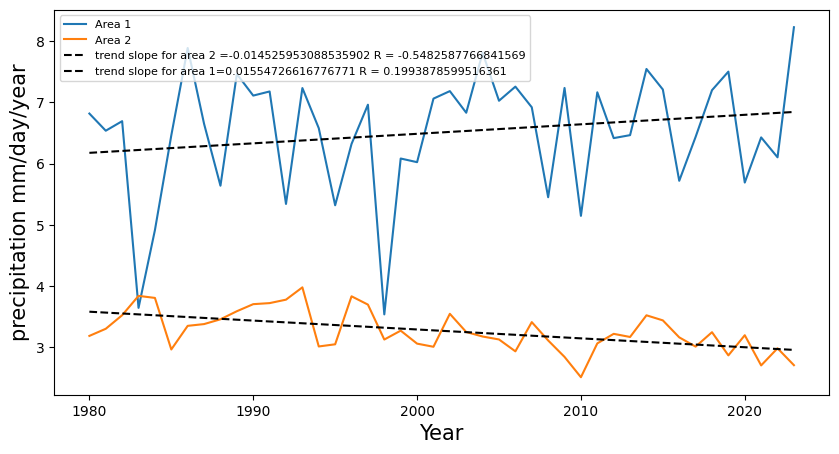

In [ ]:
#plot and compare time series in the 2 areas

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(olr_selected_ymean_1.year, olr_selected_ymean_1, label='Area 1')
ax.plot(olr_selected_ymean_2.year, olr_selected_ymean_2, label='Area 2')
ax.plot(olr_selected_ymean_2.year, trend_line2, linestyle='--', color='k', label=f'trend slope for area 2 ={slope2}'+f' R = {R2}') #plot trend line
ax.plot(olr_selected_ymean_1.year, trend_line, linestyle='--', color='k', label=f'trend slope for area 1={slope}'+f' R = {R}') #plot trend line

plt.title('', fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.ylabel('precipitation mm/day/year', fontsize=15)
plt.legend(loc='upper left', fontsize=8)                                                                                            #add legend to show the line slope
plt.show()